In [1]:
import becquerel as bq
from becquerel import Spectrum
from becquerel.tools.isotope import Isotope
from becquerel.tools.isotope_qty import IsotopeQuantity, NeutronIrradiation
import datetime
import numpy as np
import scipy.integrate as integrate
import math as m
import importlib
import pandas as pd
import sys
import os
import csv
import matplotlib.pyplot as plt
import re
sys.path.insert(0,r'C:\Users\ahanks\DoseNet\radwatch-analysis')

In [35]:
import PF
import naa_isotope_analyzer as naa
import analysis_methods as am
import ROI
importlib.reload(PF)
importlib.reload(naa)
importlib.reload(am)
importlib.reload(ROI)

<module 'ROI' from 'C:\\Users\\ahanks\\DoseNet\\radwatch-analysis\\ROI.py'>

In [36]:
def get_isotopes(energies):
    hl_cut = 600 #in becq.fetch decay radiation
    br_cut =4.0
    df = naa.naa_isotope_analyzer(energies,hl_cut,br_cut,5.0,0.5)
    
    return df

In [4]:
sample_masses = [1.0,1.1,1.0,1.1,1.0,1.0,1.1,1.0,0.9,1.0]
sample_fish = ["Petrale Sole 1","Halibut","Tilapia","Rockfish","Rock Cod","Catfish","Petrale Sole 2",
               "Wild King Salmon","Swordfish","Oysters"]
sample_mass_unc = 0.1

In [5]:
sample_index = 2

In [6]:
#use the ecal and bgspec from google drive
#implement choosing between relevant ecal and bg for diff sample groups
path = r"C:\Users\ahanks\Google Drive\RadWatch\Gamma\Gamma Spectra\Fish Samples 2019"
e_cal = np.loadtxt(path + r"\NAA\11-19-2019-Calibration.Ent")
bgspec =  Spectrum.from_file(path + r"\NAA\Background_Spectrum_12_20_19.Spe")

SpeFile: Reading file C:\Users\ahanks\Google Drive\RadWatch\Gamma\Gamma Spectra\Fish Samples 2019\NAA\Background_Spectrum_12_20_19.Spe


In [7]:
#specs for testing
sample_name = r"\NAA\ucb19"
if sample_index < 9:
    sample_name = sample_name + "0"
sample_name = sample_name + str(sample_index+1)
print(sample_name)
spec_30 = Spectrum.from_file(path+sample_name + "-30min.Spe")
spec_03 = Spectrum.from_file(path+sample_name + "-3hr.Spe")
spec_24 = Spectrum.from_file(path+sample_name+"-24hr.Spe")

\NAA\ucb1903
SpeFile: Reading file C:\Users\ahanks\Google Drive\RadWatch\Gamma\Gamma Spectra\Fish Samples 2019\NAA\ucb1903-30min.Spe
SpeFile: Reading file C:\Users\ahanks\Google Drive\RadWatch\Gamma\Gamma Spectra\Fish Samples 2019\NAA\ucb1903-3hr.Spe
SpeFile: Reading file C:\Users\ahanks\Google Drive\RadWatch\Gamma\Gamma Spectra\Fish Samples 2019\NAA\ucb1903-24hr.Spe


In [8]:
specs= [spec_30,spec_03,spec_24]
cal_specs = []
for i in range(len(specs)):
    specs[i].calibrate_like(bgspec)
    cal_specs.append(specs[i])

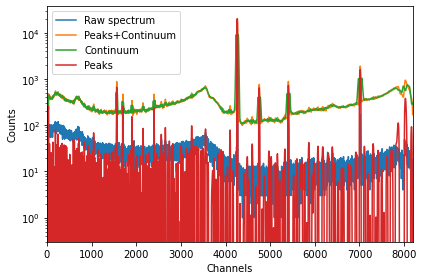

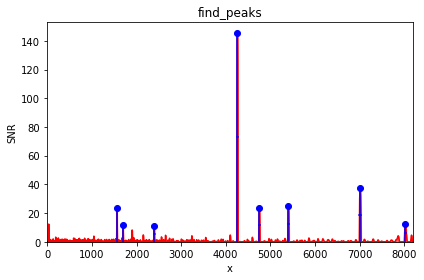

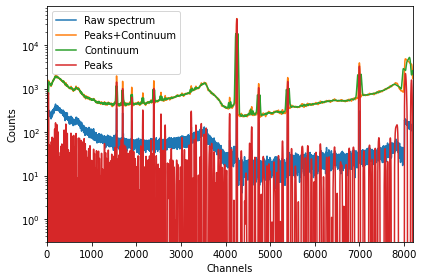

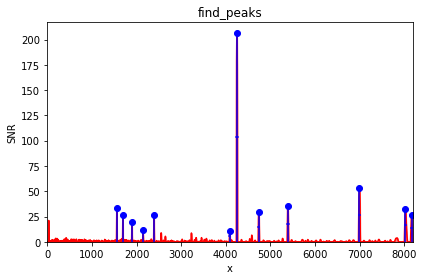

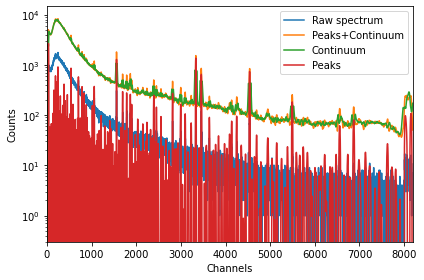

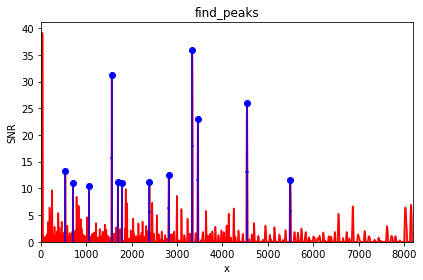

In [9]:
energies = []
for i in range(len(cal_specs)):
    energies.append(am.get_energies(cal_specs[i])) #peak finding method, bq.peakfinder


In [10]:
print(energies)

[array([ 509,  553,  775, 1366, 1522, 1729]), array([ 508,  551,  616,  695,  773, 1312, 1363, 1518, 1725, 2234]), array([ 184,  237,  349,  508,  551,  580,  772,  906, 1072, 1111])]


In [11]:
energy_shift = 3

In [37]:
iso_dfs =[]
#isotope analyzer improvement
for e in energies:
    e = e + energy_shift
    iso_dfs.append(get_isotopes(e))

Backround isotopes [[], [], [], [], ['BI214']]
Possible isotopes [['GE77', 'AS76', 'IN114', 'OS193'], ['GE77', 'GE77', 'MO99', 'TE131', 'EU152', 'HO166'], ['NA24', 'GE77', 'SB124'], ['K42'], []]
Possible isotope br [[16.8+/-1.0, 45.0, 4.4+/-0.6, 1.308+/-0.02], [1.07+/-0.06, 1.38+/-0.08, 4.31+/-0.08, 7.51+/-0.17, 12.93+/-0.08, 3.0+/-0.07], [99.9936+/-0.0015, 3.19+/-0.11, 2.624+/-0.014], [18.08], []]
Cut isotopes  [['GE77', 'AS76', 'IN114'], ['MO99', 'TE131', 'EU152'], ['NA24'], ['K42'], []]
Backround isotopes [[], [], [], [], [], [], [], ['BI214'], []]
Possible isotopes [['GE77', 'AS76', 'BR82', 'IN114', 'OS193'], ['ZN71', 'ZN71', 'BR82', 'AG110', 'BA131', 'W187', 'W187'], ['BR82', 'ZR97', 'NB94'], ['GE77', 'BR82', 'MO99', 'TE131', 'EU152', 'HO166'], ['BR82'], ['NA24', 'GE77', 'CD117', 'SB124', 'CS134'], ['K42'], [], []]
Possible isotope br [[16.8+/-1.0, 45.0, 71.7+/-1.0, 4.4+/-0.6, 1.308+/-0.02], [55.8+/-2.2, 55.8+/-2.2, 43.7+/-0.6, 2.73+/-0.08, 1.474+/-0.016, 7.57+/-0.12, 1.314+/-0.02

In [40]:
print(energies)
iso_dfs[2]

[array([ 509,  553,  775, 1366, 1522, 1729]), array([ 508,  551,  616,  695,  773, 1312, 1363, 1518, 1725, 2234]), array([ 184,  237,  349,  508,  551,  580,  772,  906, 1072, 1111])]


,isotopes,energies,branching_ratios
0,PB214,"[240, 352]","[0.0743, 0.376]"
1,XE125,"[187, 240]","[53.8, 30.0]"
2,PB212,[240],[0.4334]
3,ZN65,[1114],[50.04]
4,RB86,[1075],[8.64]


In [41]:
eff_func = am.Efficiency()
eff_func.set_parameters()

Loaded fit parameters 0-4: [-0.00530667  0.04316717 -0.01324963 -0.95566839 -4.73673214]
Loaded input energies: []
Loaded energy uncertainties: [0.03200221 0.03639874 0.03102208 0.00876822]


In [42]:
counts = []

uncertainties =[]

icounts = []
iuncertainties = []
#uses PF.PF 
for i in range(len(cal_specs)):
    icounts, iuncertainties = am.get_counts(cal_specs[i],bgspec,energies[i])
    counts.append(icounts)
    uncertainties.append(np.sqrt(icounts))

c:\users\ahanks\becquerel\becquerel\core\spectrum.py:726: SpectrumWarning:

Subtraction of counts-based specta, spectra have been converted to CPS



roi = ROI.ROI(cal_specs[0], bgspec, energies[0], sub_type = 0)
delta_e0 = 5
window0 = np.array([[-2, -1], [-0.5, 0.5], [1, 2]])
roi.set_sideband(delta_e0,window0)
roi.find_peak_energies()
target_peaks = roi.target_peaks
roi_result0,roi_uncer0 = roi.get_counts()
#peakfit = PF.PF(spectrum,background,source_energies)
#pf_result = peakfit.get_counts()
print(target_peaks)
print('ROI result:',roi_result0)
print('uncertainties:',roi_uncer0)

In [43]:
print(energies[0])
print(counts[0])
print(uncertainties[0])# the uncertainties are all over the place or equal to the real value
print(energies[1])
print(counts[1])
print(uncertainties[1])# the uncertainties are all over the place or equal to the real value


[ 509  553  775 1366 1522 1729]
[ 1035.1798577    327.60491859   273.4684593  21654.92088544
   695.29181216   783.90828623]
[ 32.17421107  18.09985963  16.53688179 147.15611059  26.36838661
  27.99836221]
[ 508  551  616  695  773 1312 1363 1518 1725 2234]
[ 2182.85924073  1223.13634873   752.26851135   404.66703809
  1140.2700329    285.99626584 43567.6051778   1130.7574831
  1580.55266843  3570.93714722]
[ 46.72107919  34.97336628  27.42751377  20.11633759  33.76788464
  16.91142412 208.72854423  33.62673762  39.75616516  59.75731878]


In [44]:
ec = np.array([[ene, counts[i]/eff_func.get_eff(ene),uncertainties[i]/eff_func.get_eff(ene)] for (i, ene) in enumerate(energies)])

C:\Users\ahanks\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



In [45]:
print("These are for spectrum 1")
print("the energies are",ec[0,0])
print("the true counts are",ec[0,1])
print("the unc on the true counts are",ec[0,2])

These are for spectrum 1
the energies are [ 509  553  775 1366 1522 1729]
the true counts are [  46317.5424284    15629.36782365   17312.71999571 2316434.02669234
   82468.67355162  105046.00838371]
the unc on the true counts are [ 1439.58595702   863.5076815   1046.91562875 15741.33766737
  3127.5585718   3751.86261288]


In [46]:
print(ec[1][0])
print(iso_dfs[1].energies[0])

[ 508  551  616  695  773 1312 1363 1518 1725 2234]
[554, 619, 698, 776, 1315]


In [47]:
spectra = 0
for s in range(3):
    iso_dfs[s]['counts'] = "0"
    iso_dfs[s]['count_unc'] = "0"

    for j, e in enumerate(iso_dfs[s]['energies']):
        iso_dfs[s]['counts'][j] = np.zeros(len(e))
        iso_dfs[s]['count_unc'][j] = np.zeros(len(e))

    for i, det_ene in enumerate(ec[s][0]):
        for j, em_enes in enumerate(iso_dfs[s]['energies']):
            for k, in_ene in enumerate(em_enes):
                if (det_ene+energy_shift) == in_ene:
                    iso_dfs[s]['counts'][j][k] = round(ec[s][1][i])
                    iso_dfs[s]['count_unc'][j][k] = round(ec[s][2][i])

In [48]:
for i,df in enumerate(iso_dfs):
    df['cps'] = df['counts']/cal_specs[i].livetime
    df['cps_unc'] = df['count_unc']/cal_specs[i].livetime
    df = df.drop('counts',1)
    iso_dfs[i] = df.drop('count_unc',1)
iso_dfs[0]

,isotopes,energies,branching_ratios,cps,cps_unc
0,NA24,[1369],[99.9936],[1286.9077777777777],[8.745]
1,K42,[1525],[18.08],[45.81611111111111],[1.7377777777777779]


In [49]:
iso_dfs[1]

,isotopes,energies,branching_ratios,cps,cps_unc
0,BR82,"[554, 619, 698, 776, 1315]","[71.7, 43.7, 28.4, 83.6, 26.9]","[5.397180224468973, 3.6312957981634355, 2.1616...","[0.15434560801409888, 0.13236248956497543, 0.1..."
1,NA24,[1366],[99.9936],[431.37779426769316],[2.066691401539746]
2,K42,[1521],[18.08],[12.40905296354698],[0.36898246915870514]


In [ ]:
#iso_dfs[1] = iso_dfs[1].drop([4])
#iso_dfs[1]

In [50]:
iso_dfs[2]

,isotopes,energies,branching_ratios,cps,cps_unc
0,PB214,"[240, 352]","[0.0743, 0.376]","[0.1452314814814815, 0.14605324074074075]","[0.0069560185185185185, 0.007650462962962963]"
1,XE125,"[187, 240]","[53.8, 30.0]","[0.15984953703703703, 0.1452314814814815]","[0.007060185185185185, 0.0069560185185185185]"
2,PB212,[240],[0.4334],[0.1452314814814815],[0.0069560185185185185]
3,ZN65,[1114],[50.04],[0.7972569444444444],[0.02849537037037037]
4,RB86,[1075],[8.64],[1.4945717592592593],[0.038356481481481484]


In [51]:
iso_dfs[2] = iso_dfs[2].drop([0,1,2])
iso_dfs[2]

,isotopes,energies,branching_ratios,cps,cps_unc
3,ZN65,[1114],[50.04],[0.7972569444444444],[0.02849537037037037]
4,RB86,[1075],[8.64],[1.4945717592592593],[0.038356481481481484]


In [52]:
for df in iso_dfs:
    Activities = []
    act_unc = []
    for i in range(len(df['cps'])):
        Activities.append(np.sum(df['cps'].iloc[i])/np.sum(df['branching_ratios'].iloc[i]))
        act_unc.append(np.sqrt(np.sum(np.power(df['cps_unc'].iloc[i],2)))/np.sum(df['branching_ratios'].iloc[i]))
    df['Activity'] = Activities
    df['Act_unc'] = act_unc

In [53]:
iso_dfs[0]

,isotopes,energies,branching_ratios,cps,cps_unc,Activity,Act_unc
0,NA24,[1369],[99.9936],[1286.9077777777777],[8.745],12.869901,0.087456
1,K42,[1525],[18.08],[45.81611111111111],[1.7377777777777779],2.534077,0.096116


In [54]:
t0 = cal_specs[0].start_time.timestamp() - (4*24*60*60) #time of irrad
print(t0)

1573349525.0


In [55]:
flux = 2*10**11 #from davis trigger reactor
Tirrad = 1 *3600 #sec irradiated
irr_start = '2019-11-08 09:14:00'
irr_stop = '2019-11-08 10:14:00'

In [56]:
new_dfs = am.calculate_concentration(iso_dfs,'Activity','mass(g)',flux,irr_start,irr_stop,cal_specs)

In [57]:
new_dfs = am.calculate_concentration(iso_dfs,'Act_unc','mass(g)-unc',flux,irr_start,irr_stop,cal_specs)

In [58]:
new_dfs[0]

,isotopes,energies,branching_ratios,cps,cps_unc,Activity,Act_unc,mass(g),mass(g)-unc
0,NA24,[1369],[99.9936],[1286.9077777777777],[8.745],12.869901,0.087456,3.677540e-08,2.499020e-10
1,K42,[1525],[18.08],[45.81611111111111],[1.7377777777777779],2.534077,0.096116,1.369661e-05,5.195041e-07


In [59]:
for df in new_dfs:
    df['ppm'] = df['mass(g)']/sample_masses[sample_index]*10000
    df['ppm-unc'] = df['mass(g)-unc']/sample_masses[sample_index]*10000
new_dfs[0]

,isotopes,energies,branching_ratios,cps,cps_unc,Activity,Act_unc,mass(g),mass(g)-unc,ppm,ppm-unc
0,NA24,[1369],[99.9936],[1286.9077777777777],[8.745],12.869901,0.087456,3.677540e-08,2.499020e-10,0.000368,0.000002
1,K42,[1525],[18.08],[45.81611111111111],[1.7377777777777779],2.534077,0.096116,1.369661e-05,5.195041e-07,0.136966,0.005195


In [33]:
import plotly.graph_objects as go

In [60]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=am.get_initial_isotopes(new_dfs[0]['isotopes']), y=new_dfs[0]['ppm'],
    error_y=dict(type='data', array=new_dfs[0]['ppm-unc']),
    name="30 min"
))
fig.add_trace(go.Bar(
    x=am.get_initial_isotopes(new_dfs[1]['isotopes']), y=new_dfs[1]['ppm'],
    error_y=dict(type='data', array=new_dfs[1]['ppm-unc']),
    name="3 hr"
))
fig.add_trace(go.Bar(
    x=am.get_initial_isotopes(new_dfs[2]['isotopes']), y=new_dfs[2]['ppm'],
    error_y=dict(type='data', array=new_dfs[2]['ppm-unc']),
    name="24 hr"
))
fig.update_layout(barmode='group',
                title={
                    'text': sample_fish[sample_index],
#                    'y':0.9,
                    'x':0.5,
                    'xanchor': 'center'},
#                    'yanchor': 'top'},
                xaxis_title="Isotope",
                yaxis_title="Concentration (ppm)"
#                font=dict(
#                    family="Courier New, monospace",
#                    size=18,
#                    color="RebeccaPurple"
#                )
)
fig.update_yaxes(type="log")
fig.show()